# **Main Goals**
## - Show most sales by:
1) Month/Year

2) Categoy

3) Sub-Category

4) Region

## - Who are the best clients?

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Getting the table

In [115]:
sales_raw = pd.read_csv('/content/drive/MyDrive/Superstore Dataset/Sample - Superstore.csv', encoding = 'ISO-8859-1')
sales_raw.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Cleaning the data

### Checking for null values

In [116]:
sales_raw_na = sales_raw[sales_raw.isna().any(axis=1)]
sales_raw_na.head()

# sales_raw = sales_raw.dropna()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


### Converting the data types

In [117]:
display(sales_raw.info())

sales_raw['Order Date'] = pd.to_datetime(sales_raw['Order Date'])
sales_raw['Ship Date'] = pd.to_datetime(sales_raw['Ship Date'])

sales_raw['month'] = sales_raw['Order Date'].dt.month
sales_raw['year'] = sales_raw['Order Date'].dt.year

sales_raw['Days to Ship'] = sales_raw['Ship Date'].sub(sales_raw['Order Date'], axis=0)
sales_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

None

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year,Days to Ship
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,11,2016,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,11,2016,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,6,2016,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,10,2015,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,10,2015,7 days


In [118]:
sales_raw[['Sales', 'Quantity', 'Discount', 'Profit', 'Days to Ship']].describe().round(2)

,Sales,Quantity,Discount,Profit,Days to Ship
count,9994.00,9994.00,9994.00,9994.00,9994
mean,229.86,3.79,0.16,28.66,3 days 22:59:46.311787072
std,623.25,2.23,0.21,234.26,1 days 17:56:29.766161104
min,0.44,1.00,0.00,-6599.98,0 days 00:00:00
25%,17.28,2.00,0.00,1.73,3 days 00:00:00
50%,54.49,3.00,0.20,8.67,4 days 00:00:00
75%,209.94,5.00,0.20,29.36,5 days 00:00:00
max,22638.48,14.00,0.80,8399.98,7 days 00:00:00


### Shipping day on average

In [119]:
ship_days = sales_raw['Days to Ship'].value_counts()
ship_days

4 days    2774
5 days    2169
2 days    1334
6 days    1203
3 days    1005
7 days     621
0 days     519
1 days     369
Name: Days to Ship, dtype: int64

### Sales by Month

In [120]:
monthly_p = sales_raw[['month', 'Profit']].groupby('month').sum()
monthly_p


,Profit
month,
1,9134.4461
2,10294.6107
3,28594.6872
4,11587.4363
5,22411.3078
6,21285.7954
7,13832.6648
8,21776.9384
9,36857.4753


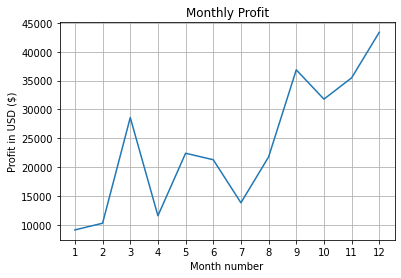

In [121]:
months = range(1,13)
profit = monthly_p['Profit']

plt.plot(months, profit)
plt.xticks(months)
plt.ylabel('Profit in USD ($)')
plt.xlabel('Month number')
plt.title('Monthly Profit')
plt.grid()

plt.show()

### Sales by Year

In [122]:
yearly_p = sales_raw[['year', 'Profit']].groupby('year').sum()
yearly_p

,Profit
year,
2014,49543.9741
2015,61618.6037
2016,81795.1743
2017,93439.2696


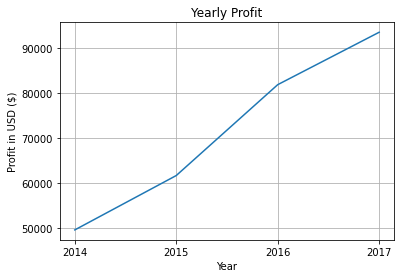

In [123]:
years = range(2014,2018)
profit = yearly_p['Profit']

plt.plot(years, profit)
plt.xticks(years)
plt.ylabel('Profit in USD ($)')
plt.xlabel('Year')
plt.title('Yearly Profit')
plt.grid()

plt.show()

### Product Profits

In [124]:
product_p = sales_raw[['Product Name', 'Profit']].groupby('Product Name').sum().sort_values('Profit', ascending=False)
product_p

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
...,...
Bush Advantage Collection Racetrack Conference Table,-1934.3976
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156
Cubify CubeX 3D Printer Triple Head Print,-3839.9904


### Sales by Sub-Category

In [125]:
results_subcategory = sales_raw.groupby('Sub-Category').sum()
results_subcategory['Profit'].sort_values(ascending = False)

Sub-Category
Copiers        55617.8249
Phones         44515.7306
Accessories    41936.6357
Paper          34053.5693
Binders        30221.7633
Chairs         26590.1663
Storage        21278.8264
Appliances     18138.0054
Furnishings    13059.1436
Envelopes       6964.1767
Art             6527.7870
Labels          5546.2540
Machines        3384.7569
Fasteners        949.5182
Supplies       -1189.0995
Bookcases      -3472.5560
Tables        -17725.4811
Name: Profit, dtype: float64

In [126]:
results_subcategory['Quantity']

Sub-Category
Accessories    2976
Appliances     1729
Art            3000
Binders        5974
Bookcases       868
Chairs         2356
Copiers         234
Envelopes       906
Fasteners       914
Furnishings    3563
Labels         1400
Machines        440
Paper          5178
Phones         3289
Storage        3158
Supplies        647
Tables         1241
Name: Quantity, dtype: int64

In [127]:
print(f"Number of different sub-categories: {sales_raw['Sub-Category'].nunique()}")

Number of different sub-categories: 17


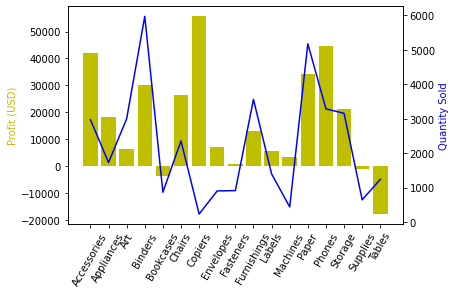

In [128]:
results_subcategory = sales_raw.groupby('Sub-Category').sum()
subcategory = [subcategory for subcategory, df in sales_raw.groupby('Sub-Category')]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(subcategory, results_subcategory['Profit'], color = 'y')
ax2.plot(subcategory, results_subcategory['Quantity'], 'b-')

ax1.set_xticklabels(subcategory, rotation= 60, size=10)
ax1.set_ylabel('Profit (USD)', color='y')
ax2.set_ylabel('Quantity Sold', color='b')

plt.show()

### Sales by Category

In [129]:
results_category = sales_raw.groupby('Category').sum()
results_category['Profit'].sort_values(ascending = False)

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

In [130]:
results_category['Quantity'].sort_values(ascending = False)

Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64

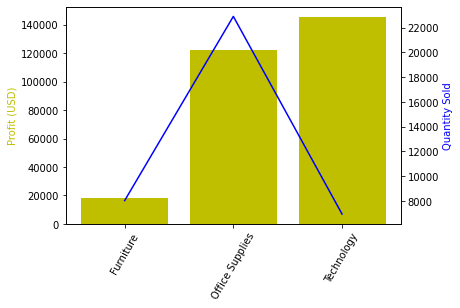

In [131]:
results_category = sales_raw.groupby('Category').sum()

category = [category for category, df in sales_raw.groupby('Category')]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(category, results_category['Profit'], color = 'y')
ax2.plot(category, results_category['Quantity'], 'b-')

ax1.set_xticklabels(category, rotation= 60, size=10)
ax1.set_ylabel('Profit (USD)', color='y')
ax2.set_ylabel('Quantity Sold', color='b')

plt.show()

### Sales by Region

In [132]:
results_region = sales_raw.groupby('Region').sum()
results_region['Profit'].sort_values(ascending = False)

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

In [133]:
results_region['Quantity'].sort_values(ascending = False)

Region
West       12266
East       10618
Central     8780
South       6209
Name: Quantity, dtype: int64

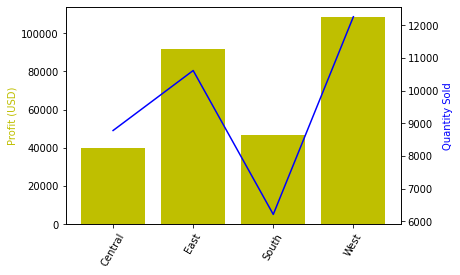

In [134]:
results_region = sales_raw.groupby('Region').sum()

region = [region for region, df in sales_raw.groupby('Region')]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(region, results_region['Profit'], color = 'y')
ax2.plot(region, results_region['Quantity'], 'b-')

ax1.set_xticklabels(region, rotation= 60, size=10)
ax1.set_ylabel('Profit (USD)', color='y')
ax2.set_ylabel('Quantity Sold', color='b')

plt.show()

### Who are the best customers?

In [135]:
print(f"Total number of customers: {sales_raw['Customer Name'].nunique()}")

Total number of customers: 793


In [136]:
best_clients = sales_raw.groupby('Customer Name').sum()


best_clients.sort_values('Profit', ascending=False).head()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,month,year
Customer Name,,,,,,,,
Tamara Chand,75386,586036,19052.218,42,1.4,8981.3239,125,24182
Raymond Buch,69857,914035,15117.339,71,1.7,6976.0959,94,36294
Sanjit Chand,73852,1671032,14142.334,87,1.4,5757.4119,177,44327
Hunter Lopez,21159,646404,12873.298,50,0.2,5622.4292,48,22164
Adrian Barton,130088,1359311,14473.571,73,4.8,5444.8055,190,40319


In [137]:
sales_raw.loc[sales_raw['Customer Name'] == 'Tamara Chand']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year,Days to Ship
2072,2073,CA-2016-129693,2016-11-26,2016-12-02,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Seattle,...,Office Supplies,Binders,Newell 3-Hole Punched Plastic Slotted Magazine...,7.312,2,0.2,2.5592,11,2016,6 days
3185,3186,CA-2014-123498,2014-11-07,2014-11-09,First Class,TC-20980,Tamara Chand,Corporate,United States,Houston,...,Office Supplies,Binders,Satellite Sectional Post Binders,26.046,3,0.8,-44.2782,11,2014,2 days
3186,3187,CA-2014-123498,2014-11-07,2014-11-09,First Class,TC-20980,Tamara Chand,Corporate,United States,Houston,...,Office Supplies,Envelopes,Staple envelope,74.352,3,0.2,26.9526,11,2014,2 days
6825,6826,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Office Supplies,Storage,Acco Perma 4000 Stacking Storage Drawers,32.480,2,0.0,4.8720,10,2016,7 days
6826,6827,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950,5,0.0,8399.9760,10,2016,7 days
6827,6828,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,735.980,2,0.0,331.1910,10,2016,7 days
6828,6829,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",34.370,7,0.0,16.8413,10,2016,7 days
6829,6830,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,...,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,33.960,2,0.0,9.5088,10,2016,7 days
8060,8061,CA-2015-156013,2015-09-20,2015-09-26,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Long Beach,...,Office Supplies,Paper,Xerox 1881,61.400,5,0.0,28.8580,9,2015,6 days
8061,8062,CA-2015-156013,2015-09-20,2015-09-26,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Long Beach,...,Office Supplies,Binders,Recycled Premium Regency Composition Covers,24.448,2,0.2,8.8624,9,2015,6 days
